# CSI 4142 - Introduction to Data Science
# Assignment 1: Exploratory Data Analysis

Shacha Parker (300235525)\
Callum Frodsham and (300199446)\
Group 79

In [290]:
# Initial Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import kagglehub

## Analysis Reasoning
We're doing the EDA on the following two datasets to familiarize ourselves with the process. (more text here)

<h1 >Dataset 1: Mobile Device Usage and User Behavior</h1>
Author: Vala Khorasani
<br>
Purpose: The purpose of this dataset is to provide insights pertaining to mobile device user behaviour and the connection to their usage patterns.
<br>
Shape: This Data set is composed of 11 Columns, and 700 rows.
<br><br>
Link: <a href="https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset"> Mobile Device Usage and User Behavior</a>
<br>
Note: This dataset skews heavily towards Android users. iOS users make up only 1/5th of the dataset, and iOS data is only gathered from iPhone 12 users. Depending on where in the world this data was gathered and where it will be made use of, it may not accurately reflect the demographics of, for example, the United States.


<br>
<h3>Dataset Feature List:</h3>
<ol>
    <li>User ID
    <br>
    Feature Type: Categorical - Nominal
    <br>
    Description: The User ID is a unique ID that is assigned to each mobile device user to track their mobile device usage individually. There are 700 entries, labeled '1' to '700'.
        </li>
    <br>
    <li>Device Model<br>
    Feature Type: Categorical - Nominal<br>
    Description: Model of the User's smartphone.
    </li>
    <br>
    <li>Operating System<br>
    Feature Type: Categorical - Nominal<br>
    Description:Operating system running on the mobile device. Only Android or iOS.
    </li>
    <br>
    <li>App Usage Time<br>
    Feature Type: Quantitative - Continuous<br>
    Description: Total daily time spent using mobile applications, measured in minutes
    </li>
    <br>
    <li>Screen On Time<br>
    Feature Type: Quantitative - Continuous<br>
    Description: Average daily duration the screen is active, measured in hours
    </li>
    <br>
    <li>Battery Drain<br>
    Feature Type: Quantitative - Continuous<br>
    Description: Amount of battery consumed daily, measured in milliamp hours (mAh)
    </li>
    <br>
    <li>Number of Apps Installed<br>
    Feature Type: Quantitative - Discrete<br>
    Description: Total number of applications installed on the device
    </li>
    <br>
    <li>Data Usage<br>
    Feature Type: Quantitative - Continuous<br>
    Description: Daily mobile data consumption, measured in megabytes (MB)
    </li>
    <br>
    <li>Age<br>
    Feature Type: Quantitative - Discrete<br>
    Description: Age of the user in years
        </li>
    <br>
    <li>Gender<br>
    Feature Type: Categorical - Nominal (Male/Female)<br>
    Description: Gender of the user
    </li>
    <br>
    <li>User Behaviour Class<br>
    Feature: Categorical - Ordinal<br>
    Description: Classification of user behavior based on usage patterns (1 to 5).
    </li>
</ol>

In [291]:
# Import dataset from Kaggle
# Download latest version
mobileDeviceDirectory = kagglehub.dataset_download("valakhorasani/mobile-device-usage-and-user-behavior-dataset")

print("Path to dataset files:", mobileDeviceDirectory)

mobileDeviceCSV = mobileDeviceDirectory + "/user_behavior_dataset.csv"

print("Path to dataset files:", mobileDeviceCSV)

Path to dataset files: C:\Users\larry\.cache\kagglehub\datasets\valakhorasani\mobile-device-usage-and-user-behavior-dataset\versions\1
Path to dataset files: C:\Users\larry\.cache\kagglehub\datasets\valakhorasani\mobile-device-usage-and-user-behavior-dataset\versions\1/user_behavior_dataset.csv


In [292]:
# generate descriptions of the dataset's features
data = pd.read_csv(mobileDeviceCSV)

display(data)
data.describe()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [293]:
print(data.iloc[0])

User ID                                    1
Device Model                  Google Pixel 5
Operating System                     Android
App Usage Time (min/day)                 393
Screen On Time (hours/day)               6.4
Battery Drain (mAh/day)                 1872
Number of Apps Installed                  67
Data Usage (MB/day)                     1122
Age                                       40
Gender                                  Male
User Behavior Class                        4
Name: 0, dtype: object


##### Insight 1 (Insight Type):

Number of Apps seems to directly decide the User Behaviour.

<Axes: xlabel='User Behavior Class', ylabel='count'>

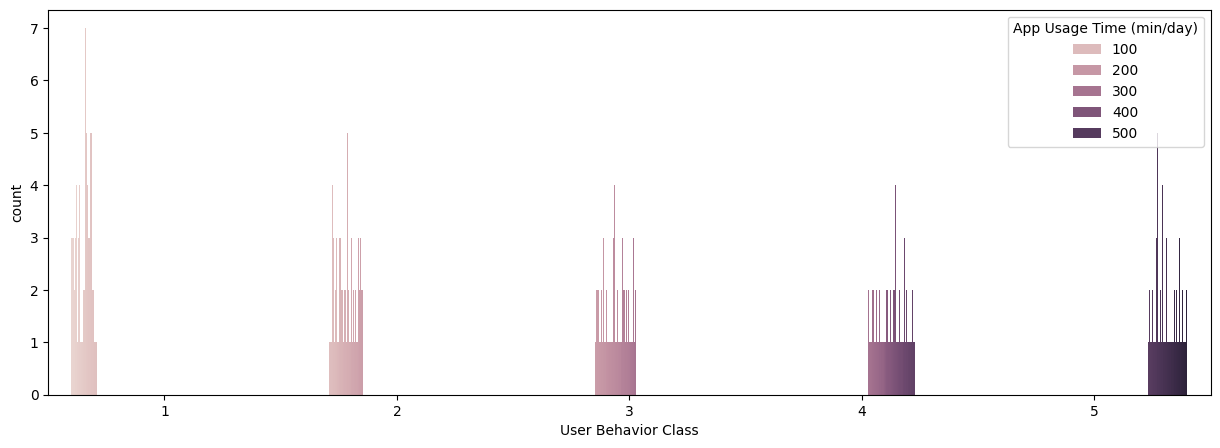

In [294]:
fig = plt.figure(figsize=(15, 5))

sns.countplot(x='User Behavior Class', hue='App Usage Time (min/day)', data=data)

<h5> Insight 2 (Insight Type):</h5>

In [295]:
#insight code 10

<h5> Insight 3 (Insight Type):</h5>

In [296]:
#insight code 10

<h5> Insight 4 (Insight Type):</h5>

In [297]:
#insight code 10

<h5> Insight 5 (Insight Type):</h5>

In [298]:
#insight code 10

<h5> Insight 6 (Insight Type):</h5>

In [299]:
#insight code 10

<h5> Insight 7 (Insight Type):</h5>

In [300]:
#insight code 10

<h5> Insight 8 (Insight Type):</h5>

In [301]:
#insight code 10

<h5> Insight 9 (Insight Type):</h5>

In [302]:
#insight code 10

<h5> Insight 10 (Insight Type):</h5>

In [303]:
#insight code 10

<h1>Dataset 2: E-Commerce Shipping Data</h1>
<h2>Introduction:</h2>
<p>This exploratory report aims to investigate the E-commerce shipping dataset, and to supply insights that could assist the e-commerce business in optimizing its logistics and customer service. Leveraging bivariate and univariate analysis techniques, this report will attempt to shed light on queries such as: the average discount provided per the number of customer support calls, differences in delivery timeliness per gender, and how product importance affects delivery timeliness.
</p>


<br>
Author: Prachi Golpani
<br>
Purpose: The purpose of this dataset is to provide insights based on the customer purchase data and shipping data of an international e-commerce business.
<br>
Shape: This dataset is composed of 12 Columns, and 10999 rows.
<br><br>
Link:
<a href="https://www.kaggle.com/datasets/prachi13/customer-analytics"> E-Commerce Shipping Data</a>
<br>
<h3>Dataset Feature List: </h3>
<ol>
    <li>Customer ID:
    <br>
    Feature Type: Categorical - Nominal
    <br>
    Description: The Customer ID is a unique ID that is assigned to each customer, allowing the E-commerce business to track the customer's purchases. There are 10999 entries, ranging from 1-10999.
    </li>
    <br>
    <li>Warehouse Block:
    <br>
    Feature Type: Categorical - Nominal
    <br>
    Description: A Warehouse block is a division of the shipping e-commerce business' warehouse. There are 5 blocks labelled A,B,C,D,F. The specific block designates where a product was stored in the e-commerce warehouse. 
        </li>
    <br>
    <li>Mode of Shipment:
    <br>
    Feature Type: Categorical - Nominal
    <br>
    Description: The mode of shipment describes the shipping method used to deliver the product to the customer. There are 3 modes of shipment: road, flight, and ship. 
        </li>
    <br>
    <li>Customer Care Calls:
    <br>
    Feature Type: Numerical - Discrete
    <br>
    Description: Customer Care Calls provides the number of times a customer called the e-commerce business to inquire about the product, and anything related to the process of purchase and delivery.
        </li>
    <br>
    <li>Customer Rating:
    <br>
    Feature Type: Categorical - Ordinal
    <br>
    Description: The customer rating represents the rating given by the customer to the e-commerce business regarding the product(s) purchased, the delivery experience, and the ordering process for that specific order. The rating ranges from 1-5, 1 indicating the most negative experience, and 5 being the most positive experience.
        </li>
    <br>
    <li>Cost of Product:
    <br>
    Feature Type: Numerical - Continuous
    <br>
    Description: The cost of the product is the value of the product in USD. 
        </li>
    <br>
    <li>Prior Purchases:
    <br>
    Feature Type: Numerical - Discrete
    <br>
    Description: Prior Purchases represents the number of times a customer has previously purchased a product from the e-commerce business.
        </li>
    <br>
    <li>Product Importance:
    <br>
    Feature Type: Categorical - Ordinal
    <br>
    Description: Product Importance is the level of importance the e-commerce business has placed on a specific product. The importance scale has values: low, medium, and high. Low denoting the lowest importance, medium denoting the mid level importance, and high denoting the most important.
        </li>
    <br>
    <li>Gender:
    <br>
    Feature Type: Categorical - Nominal (Male/Female)
    <br>
    Description: The Gender of the customer.
        </li>
    <br>
    <li>Discount Offered:
    <br>
    Feature Type: Numerical - Discrete
    <br>
    Description: Discount offered is the percentage reduction in price of the product purchased.
        </li>
    <br>
    <li>Weight In Grams:
    <br>
    Feature Type: Numerical - Continuous
    <br>
    Description: The weight of the product measured in grams.
        </li>
    <br>
    <li>Reached on Time:
    <br>
    Feature Type: Categorical - Nominal (0/1)
    <br>
    Description: A binary value indicating if the product reached its intended destination on time. 0 means the product did reach on time, and 1 means that the product did not.
        </li>
</ol>

In [304]:
# Retrieve Latest version of the e-commerce dataset from kaggle
ec_dataset_path = kagglehub.dataset_download("prachi13/customer-analytics")
print("Path to dataset: ", ec_dataset_path)

# Get the path of the dataset csv
# Walk along the directory to get the csv filename
for root, dirs, files in os.walk(ec_dataset_path):
    for filename in files:
        ec_dataset_path = os.path.join(ec_dataset_path, filename)

# Converting the csv into dataframe
ec_dataframe = pd.read_csv(ec_dataset_path)

# Get the dataset loaded
ec_dataset = pd.read_csv(ec_dataset_path)

Path to dataset:  C:\Users\larry\.cache\kagglehub\datasets\prachi13\customer-analytics\versions\1


<h2>E-Commerce Dataset Insights:</h2>

<h4>Insight 1 (Descriptive): </h4>
The distribution of product prices reveals that the majority of the products sold by the e-commerce business fall within the $125-$275 price range.
<br><br>
Analysis Type (R1):
<br>
The type of analysis used to arrive to this insight was a Univariate Analysis. Specifically, a distribution of the sold product price, to the amount of products sold at that price.

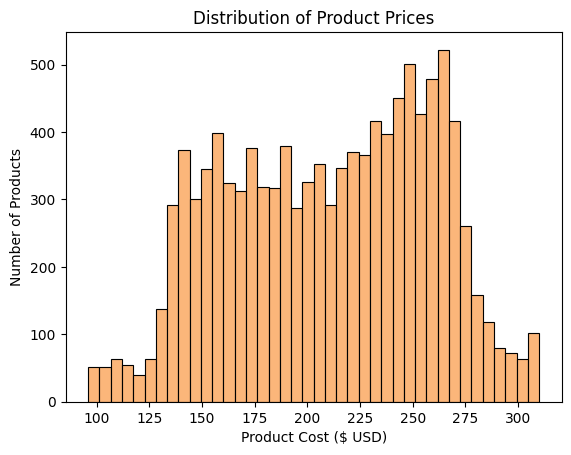

In [305]:
#Insight 1 code:
# Use the newly created dataframe to create a histogram showing the distribution of product prices 
sns.histplot(ec_dataframe["Cost_of_the_Product"], bins = 40, color="#fa9e4d")
# create scale at bottom of graph
plt.xticks(np.arange(100, 315, 25))
# graph title, and labelling
plt.title("Distribution of Product Prices")
plt.xlabel("Product Cost ($ USD)")
plt.ylabel("Number of Products")
plt.show()


<h4>Insight 2 (Descriptive):</h4>
The customer ratings of the e-commerce business service and its products are nearly evenly distributed, with the largest difference between ratings (5 and 3) being being just 3.1%.
<br><br>
Analysis Type (R2):
<br>
A bivariate analysis was used to arrive at this conclusion. A categorical countplot was the specific analysis method employed.

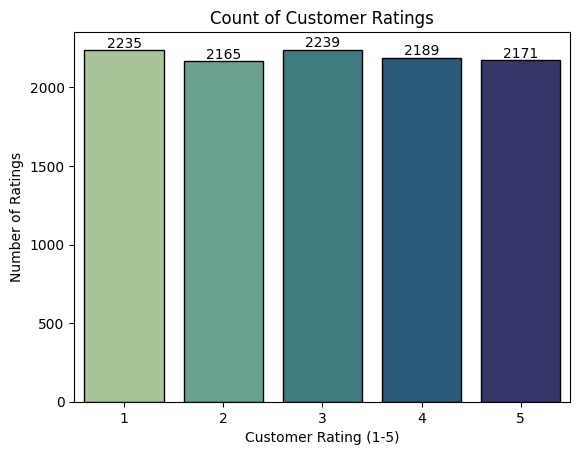

In [306]:
#Insight 2 code:
# Create the initial graph, using the Customer Rating Column
graph = sns.countplot(data=ec_dataframe, x ="Customer_rating", hue ="Customer_rating", palette="crest", legend=False, edgecolor="black")

# Loop over the bar values to annotate
for bar in graph.containers:
    graph.bar_label(bar, label_type="edge")
# graph title, and labelling
plt.title("Count of Customer Ratings")
plt.xlabel("Customer Rating (1-5)")
plt.ylabel("Number of Ratings")
plt.show()

<h4> Insight 3 (Diagnostic): </h4>
Products with a high-importance factor show a worse late delivery percentage (64.98%), compared to low- and medium-importance products (59.27%, 58.55%) which indicates that the e-commerce business does not actually prioritize their high importance products as much as their low and medium importance products.
<br><br>
Analysis Type (R5):
<br>
The type of analysis used to arrive to this insight was a Bivariate Analysis. Specifically, it was a categorical comparison with the two features being the product importance, and reached on time status.

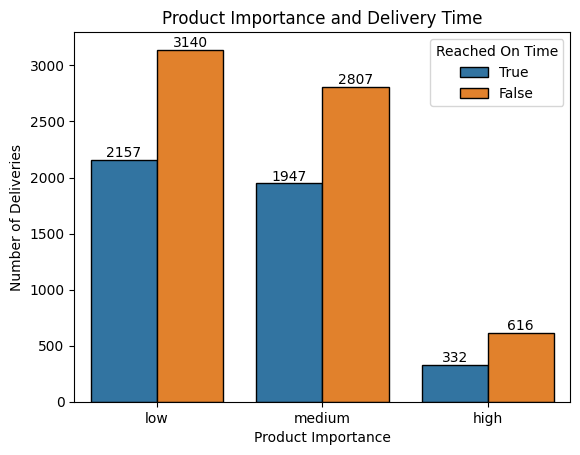

In [307]:
#Insight 3 code:
# Create the graph
graph = sns.countplot(data=ec_dataframe, x ="Product_importance", hue="Reached.on.Time_Y.N", edgecolor="black")

# Annotate bars
for bar in graph.containers:
    graph.bar_label(bar, label_type="edge")

# graph legend, title, and labelling
plt.legend(title="Reached On Time", labels=["True", "False"]) 
plt.title("Product Importance and Delivery Time")
plt.xlabel("Product Importance")
plt.ylabel("Number of Deliveries")
plt.show()

<h4> Insight 4 (Prescriptive):</h4>
Based on the positive correlation between the average product cost and the number of care calls, the e-commmerce business should optimize the customer support system to reduce costly customer care interactions.
<br><br>
Analysis Type (R7):
<br>
A bivariate analysis was employed, wherein the customer care calls feature was treated as a categorical feature, and the product cost feature was averaged per number of customer care calls to reveal a trend. This average price distribution was plotted using a barplot.

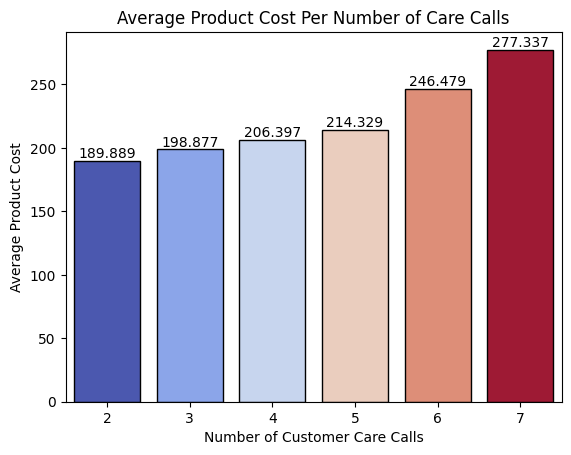

In [308]:
#Insight 4 code:
# Get the average price of the product cost for the amount of care calls made
avg = ec_dataframe.groupby("Customer_care_calls")["Cost_of_the_Product"].mean().reset_index()

# Create barplot
graph = sns.barplot(data=avg, x ="Customer_care_calls", y="Cost_of_the_Product", hue="Customer_care_calls", palette="coolwarm", legend=False, edgecolor="black")

# Annotate bars with their values
for bar in graph.containers:
    graph.bar_label(bar, label_type="edge")

# add title and labels
plt.title("Average Product Cost Per Number of Care Calls")
plt.ylabel("Average Product Cost")
plt.xlabel("Number of Customer Care Calls")
plt.show()

<h4> Insight 5 (Diagnostic):</h4>
The on-time delivery rate is the same for both men and women, indicating that the e-commerce business does not have an inherent bias for either gender. 
<br><br>
Analysis Type (R4):
<br>
The method of analysis employed was a bivariate categorical analysis where each category only has two values. A countplot was used to visualize the frequency of each value.

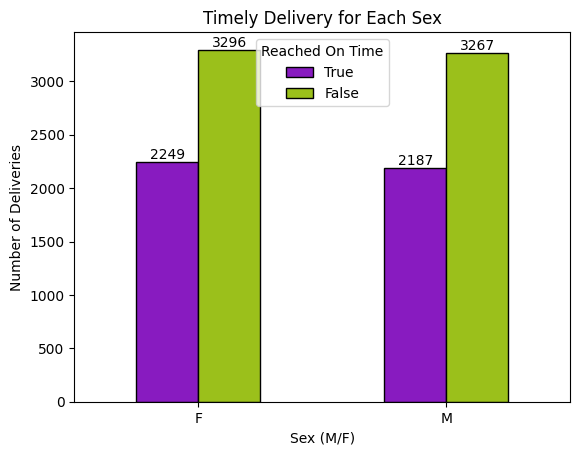

In [309]:
# create Graph
graph = sns.countplot(data=ec_dataframe, x="Gender", hue="Reached.on.Time_Y.N", palette=["#9100DB", "#AADB00"], width=0.5, edgecolor="black")

# annotate graph
for bar in graph.containers:
    graph.bar_label(bar, label_type="edge")

# add title, and labels
plt.legend(title="Reached On Time", labels=["True", "False"])
plt.title("Timely Delivery for Each Sex")
plt.ylabel("Number of Deliveries")
plt.xlabel("Sex (M/F)")
plt.show()

<h4> Insight 6 (Diagnostic):</h4>
Since the average percentage discount and the number of care calls is negatively correlated the e-commerce business might be providing smaller discounts to frequent callers as a means of conflict resolution.
<br><br>
Analysis Type (R7):
<br>
A bivariate analysis was used, wherein the customer care calls feature was treated as a categorical feature, and the discount offered feature was averaged per number of customer care calls to reveal a trend. The trend was visualized using a barplot, with customer care calls on the x-axis, and average discount lying on the y-axis.

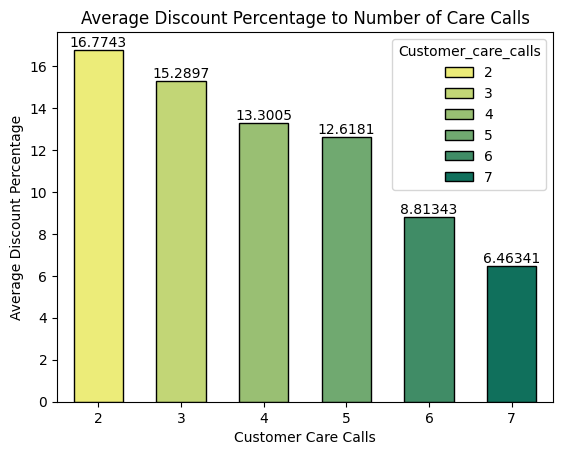

In [310]:
# get the average of the customer care calls to the discounts offered
average_of_p_to_imp = ec_dataframe.groupby("Customer_care_calls")["Discount_offered"].mean().reset_index()

# Create the graph
graph = sns.barplot(data = average_of_p_to_imp, 
                    x="Customer_care_calls",
                    y = "Discount_offered", 
                    hue="Customer_care_calls", 
                    palette="summer_r", 
                    width=0.6,
                    edgecolor="black"
                    )

# add bar values (annotations)
for bar in graph.containers:
    graph.bar_label(bar)

# display title, and labels
plt.title("Average Discount Percentage to Number of Care Calls")
plt.ylabel("Average Discount Percentage")
plt.xlabel("Customer Care Calls")
plt.show()

<h4> Insight 7 (Prescriptive):</h4>
The sales data shows that there are two distinct purchasing patterns indicating strong demand for products weighing 1000-2000g and 4000-6000g respectively, the e-commerce business should optimize their sales strategy to continue focusing on these product categories. 
<br><br>
Analysis Type (R1):
<br>
A univariate analysis method was conducted to visualize the product weight distrubution.  

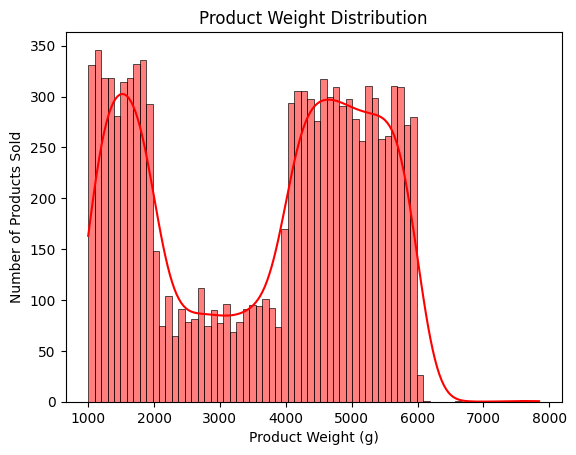

In [311]:
#insight code 7

# create the graph
graph = sns.histplot(data=ec_dataframe, x="Weight_in_gms", kde=True, color="red", bins=70)

# Graph labels
plt.title("Product Weight Distribution")
plt.ylabel("Number of Products Sold")
plt.xlabel("Product Weight (g)")
plt.show()


<h4> Insight 8 (Descriptive):</h4>
Warehouse block F processes almost exactly double the the products compared to blocks A to D, this could suggest that warehouse block F has a greater capacity, or greater efficiency in processing products.

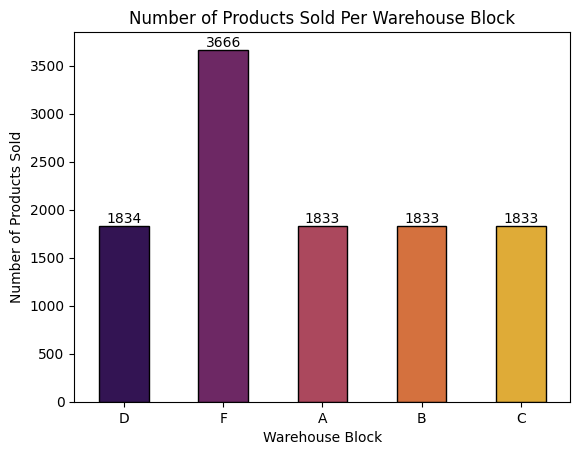

In [312]:
# Create the graph for insight 8
graph = sns.countplot(data=ec_dataframe, x="Warehouse_block", hue ="Warehouse_block", palette="inferno", width=0.5, edgecolor="black")


# annotate the bars
for bar in graph.containers:
    graph.bar_label(bar)

# add labels and title
plt.title("Number of Products Sold Per Warehouse Block")
plt.ylabel("Number of Products Sold")
plt.xlabel("Warehouse Block")
plt.show()


Analysis Type (R2):
<br>
A univariate analysis method was employed, and plotted with a countplot to count the number of products sold per warehouse block. 

<h4> Insight 9 (Descriptive):</h4>
The e-commerce business provides approximately 13% greater discounts on average for products that did not reach on time compared to those that did reach on time, this is likely due to the fact that customers will leave negative reviews if their products are not delivered in a timely manner.
<br><br>
Analysis Type (R7):
<br>
A bivariate analysis was conducted by calculating the average percent discount for each value belonging to the reached on time categorical feature. The values were visualized using a barplot.

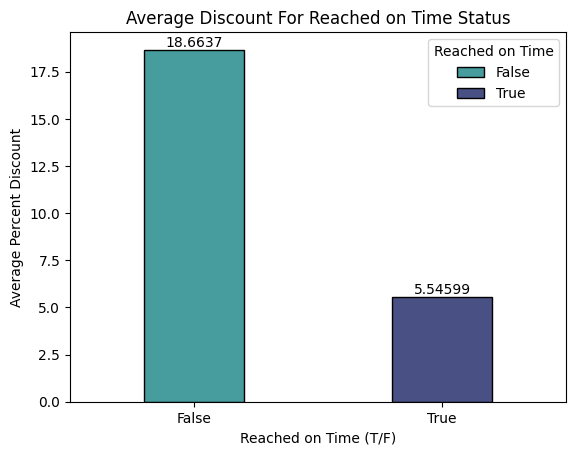

In [313]:
#insight code 9
# Create a map to convert the values from true to false using map
true_false_map = {0:True, 1:False}
# create deep copy, for sequential runs, and no NaN issues
ec_copy = ec_dataframe.copy(deep=True)
# map the values
ec_copy["Reached.on.Time_Y.N"] = ec_copy["Reached.on.Time_Y.N"].map(true_false_map)
# Get the average of the discount for each reached on time
avg = ec_copy.groupby("Reached.on.Time_Y.N")["Discount_offered"].mean().reset_index()
# Graph it
graph = sns.barplot(data = avg, x="Reached.on.Time_Y.N", y="Discount_offered", hue="Reached.on.Time_Y.N", width=0.4, palette="mako_r", edgecolor="black")
# annotate bars with their value
for bar in graph.containers:
    graph.bar_label(bar)
# labels and titles
plt.legend(title="Reached on Time")
plt.title("Average Discount For Reached on Time Status")
plt.ylabel("Average Percent Discount")
plt.xlabel("Reached on Time (T/F)")
plt.show()

<h4> Insight 10 (Predictive):</h4>
With an on-time delivery rate of approximately 40% and a late-delivery rate of 60%, the e-commmerce business could lose customers if the delivery-time issues are left unresolved. 
<br><br>
Analysis Type (R1):
<br>
A univariate analysis was conducted to visualize the frequency of the reached on time feature's binary values using a countplot.

Percent of Deliveries Reaching on time: 40.33%


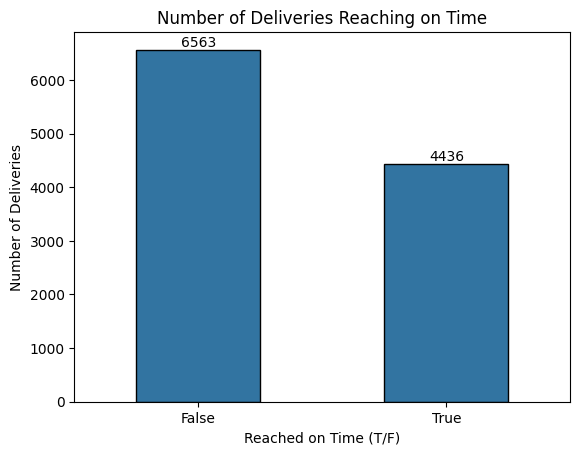

In [314]:
# Create a map to convert the values from true to false using map
true_false_map = {0:True, 1:False}
# create deep copy, for sequential runs, and no NaN issues
ec_copy = ec_dataframe.copy(deep=True)
# map the values
ec_copy["Reached.on.Time_Y.N"] = ec_copy["Reached.on.Time_Y.N"].map(true_false_map)
# Create graph using copy
graph = sns.countplot(data = ec_copy, x= "Reached.on.Time_Y.N", edgecolor="black", width=0.5)
# get calculation for percentage
not_on_time, on_time  = ec_dataframe.value_counts("Reached.on.Time_Y.N")
print("Percent of Deliveries Reaching on time: " + str((on_time / (on_time + not_on_time))*100)[0:5] + "%")
# Annotate Graph
for bar in graph.containers:
    graph.bar_label(bar)
# title and labels
plt.title("Number of Deliveries Reaching on Time")
plt.ylabel("Number of Deliveries")
plt.xlabel("Reached on Time (T/F)")
plt.show()

<h2>Conclusion</h2>


<h2>Dataset 2 References:</h2>
<ul>
<li>How to annotate bar graph bars: <a href="https://stackoverflow.com/questions/64780251/how-to-annotate-a-seaborn-barplot-with-the-aggregated-value">Annotating Graph Bars (stackoverflow)</a></li>
<li>Refresher to help calculate the mean of a category: <a href="https://www.geeksforgeeks.org/pandas-groupby/?ref=lbp">geeksforgeeks Pandas groupby</a></li>
<li>Fun colour choices: <a href="https://matplotlib.org/stable/users/explain/colors/colormaps.html">Matplotlib Docs Colormaps</a></li>
<li>General Matplotlib info: <a href="https://matplotlib.org/stable/index.html">Matplotlib Documentation</a></li>
<li>General Seaborn info:<a href="https://seaborn.pydata.org/api.html">Seaborn Documentation</a></li>
</ul>
